In [6]:
from google.cloud import language_v1
import os
import re

In [7]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = './cueback-app-e91f3f8c0155.json'

In [8]:
client = language_v1.LanguageServiceClient()

In [9]:
def extract_entity(text):
    global client
    document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
    return client.analyze_entities(request={'document': document})

def extract_sentiment(text):
    global client
    document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
    return client.analyze_sentiment(request={'document': document})

In [10]:
def entity_sentiment(text):
    if len(text.split()) > 0:
        r1 = extract_entity(text)
        entities_sentiment={}
        for e in r1.entities:
            if str(e.type_) in ['Type.PERSON', 'Type.ORGANIZATION', 'Type.LOCATION', 'Type.DATE']:
                sentiments = []
                for mention in e.mentions:
                    try:
                        sentences = re.findall(r"([^.]*?"+mention.text.content+"[^.]*\.)",text)  
                        for s in sentences:
                            sentiment = extract_sentiment(s)
                            sentiments.append(sentiment.document_sentiment.score)
                    except:
                        pass
                if len(sentiments) != 0:
                    entities_sentiment[(e.name,str(e.type_).split(".")[1])] = sum(sentiments) / len(sentiments)
        entities_sentiment = dict(sorted(entities_sentiment.items(), key=lambda item: item[1], reverse=True))
        print(entities_sentiment)
        return entities_sentiment

# Aggregated Test using data from the App pilot

In [11]:
import pandas as pd 
from tqdm import tqdm

In [12]:
tqdm.pandas()

/Users/mo/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [13]:
test_df = pd.read_csv('data/platform data.csv')
test_df.columns

Index(['Unnamed: 0', 'Title', 'Len', 'Ed', 'Woody', 'Photo'], dtype='object')

In [14]:
len(test_df)

14

## Analysis

In [15]:
test_df['len_insights'] = test_df['Len'].apply(entity_sentiment)

{('DJ Trainees', 'PERSON'): 0.800000011920929, ('Steve Stagnero', 'PERSON'): 0.6000000238418579, ('1971', 'DATE'): 0.2500000037252903, ('KCPR', 'ORGANIZATION'): 0.22000000327825547, ('parts', 'LOCATION'): 0.10000000149011612, ('Format Sheets', 'PERSON'): 0.02500000037252903, ('few', 'PERSON'): 0.0, ('The Lounge', 'ORGANIZATION'): 0.0, ('DJ trainees', 'PERSON'): -0.10000000149011612, ('world', 'LOCATION'): -0.10000000149011612, ('Blood, Sweat & Tears', 'ORGANIZATION'): -0.10000000149011612, ('Beach Boys', 'ORGANIZATION'): -0.10000000149011612, ('The Who', 'ORGANIZATION'): -0.10000000149011612, ('Andy Williams', 'PERSON'): -0.10000000149011612, ('Winter Quarter', 'PERSON'): -0.20000000298023224, ('1972', 'DATE'): -0.20000000298023224, ('anyone', 'PERSON'): -0.4000000059604645}
{('radio station', 'ORGANIZATION'): 0.10000000149011612, ('student', 'PERSON'): 0.10000000149011612, ('everyone', 'PERSON'): 0.10000000149011612, ('DJ trainees', 'PERSON'): 0.10000000149011612, ('Jim Stueck', 'PERS

{('class D stations', 'ORGANIZATION'): 0.4000000059604645, ('1966', 'DATE'): 0.20000000298023224, ('FCC', 'ORGANIZATION'): 0.15000000223517418, ('factory', 'LOCATION'): 0.10000000149011612, ('Marty Hijmans', 'PERSON'): 0.10000000149011612, ('facilities', 'LOCATION'): 0.0, ('band', 'ORGANIZATION'): 0.0, ('anyone', 'PERSON'): 0.0, ('AC', 'ORGANIZATION'): 0.0, ('Electrical Engineering Department', 'ORGANIZATION'): 0.0, ('October 27, 1969', 'DATE'): 0.0, ('July 14, 1970', 'DATE'): 0.0, ('KCPR', 'ORGANIZATION'): -0.023809525910969617, ('transmitter site', 'LOCATION'): -0.033333333830038704, ('Visual Electronics', 'ORGANIZATION'): -0.033333336313565574, ('Cal Poly', 'ORGANIZATION'): -0.05000000447034836, ('two', 'PERSON'): -0.05000000447034836, ("Ed O'Brien", 'PERSON'): -0.09000000357627869, ('Len Filomeo', 'PERSON'): -0.10000000149011612, ('stations', 'ORGANIZATION'): -0.10000000149011612, ('Jampro JA-1BE', 'ORGANIZATION'): -0.10000000149011612, ('studio', 'ORGANIZATION'): -0.10000000149011

{('record library', 'LOCATION'): 0.8999999761581421, ('Steve Greenberg', 'PERSON'): 0.5, ('Gotham City', 'LOCATION'): 0.5, ('studio', 'LOCATION'): 0.3500000014901161, ('home', 'LOCATION'): 0.3333333383003871, ('professionals', 'PERSON'): 0.30000001192092896, ("Ed O'Brien", 'PERSON'): 0.27142857547317234, ('Al Beckner', 'PERSON'): 0.2500000037252903, ('studios', 'LOCATION'): 0.20000000298023224, ('stations production library', 'LOCATION'): 0.20000000298023224, ('suspects', 'PERSON'): 0.20000000298023224, ('GrassSmoker', 'ORGANIZATION'): 0.1666666716337204, ('spot', 'LOCATION'): 0.13000000417232513, ('Eric Dausman', 'PERSON'): 0.10000000397364299, ('station', 'LOCATION'): 0.10000000149011612, ('station', 'ORGANIZATION'): 0.10000000149011612, ('The Commissioner', 'PERSON'): 0.10000000149011612, ('KCPR', 'ORGANIZATION'): 0.0899999976158142, ('Each', 'PERSON'): 0.0, ('Kung-Fu', 'LOCATION'): 0.0, ('Cheryl Wright', 'PERSON'): 0.0, ('characters', 'PERSON'): 0.0, ('each other', 'PERSON'): 0.0, 

In [ ]:
test_df['Ed'] = test_df['Ed'].astype(str)
test_df['ed_insights'] = test_df['Ed'].apply(entity_sentiment)

In [ ]:
test_df['Woody'] = test_df['Ed'].astype(str)
test_df['woody_insights'] = test_df['Woody'].apply(entity_sentiment)

In [ ]:
test_df.to_csv('analyzed platform data.csv')

## Aggregation

In [37]:
entities_dict = {}
dfs=[]
def get_dfs(d):
    global dfs
    entities_df = pd.DataFrame.from_dict(d, orient='index').reset_index().rename({'index':'entity',0:'sentiment'},axis=1)
    dfs.append(entities_df)
    
test_df['len_insights'].apply(get_dfs)

entities_df = pd.concat(dfs)

In [38]:
entities_df['entity_type'] = entities_df['entity'].apply(lambda x: x[1])
entities_df['entity'] = entities_df['entity'].apply(lambda x: x[0])

In [40]:
agg_entities_df = entities_df.groupby(['entity','entity_type']).agg(['mean', 'count']).reset_index()
agg_entities_df.columns = agg_entities_df.columns.droplevel(0)
agg_entities_df.columns = ['entity','entity_type','sentiment', 'count']
agg_entities_df.sort_values('sentiment', ascending=False , inplace=True)
count_entities_df = agg_entities_df.sort_values('count', ascending=False )

,,,mean,count
0,1960,DATE,0.000000,1
1,1966,DATE,0.200000,1
2,1968,DATE,-0.160000,1
3,1969,DATE,0.125000,2
4,1970,DATE,-0.111111,3
...,...,...,...,...
313,turntables,PERSON,0.033333,1
314,two,PERSON,-0.050000,1
315,unit,ORGANIZATION,0.200000,1
316,wife,PERSON,-0.100000,1


In [43]:
agg_entities_df.to_csv('aggregated entities in platform data.csv')

In [44]:
agg_entities_df[agg_entities_df['entity_type']=="PERSON"].to_csv('people in platform data.csv')

# Visuals

Top 10 Entities by sentiment

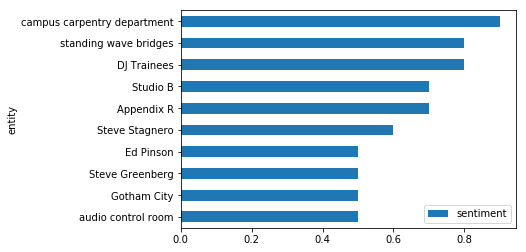

In [27]:
plt= agg_entities_df.head(10).sort_values('sentiment').plot.barh(x='entity', y='sentiment')


Top 10 Entities by count

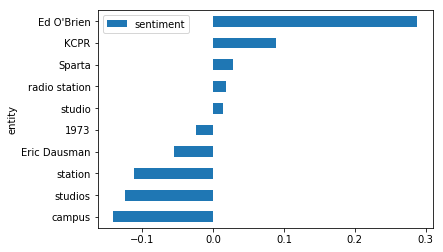

In [28]:
count_entities_df.head(10).sort_values('sentiment').plot.barh(x='entity', y='sentiment')

Least 10 Entities by sentiment

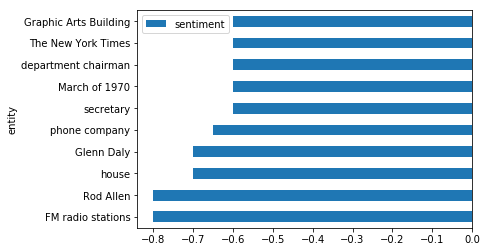

In [29]:
count_entities_df.sort_values('sentiment').head(10).plot.barh(x='entity', y='sentiment')